In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [36]:
dataBase1 = pd.read_csv('BD-Inmuebles.csv', encoding='latin1')
dataBase2 = pd.read_csv('Futbol.csv', encoding='latin1')

# BD-Inmuebles

In [37]:
dataBase1

,TipodeInmueble,Operacion,Provincia,Superficie,Precio_Venta,Fecha_Venta,Vendedor,Satisfaccion
0,Casa,Alquiler,Girona,168.79,1754463,21/11/04,Carmen,Muy buena
1,Casa,Alquiler,Tarragona,148.39,1725722,08/10/04,Luisa,Muy buena
2,Casa,Alquiler,Girona,143.55,1427270,21/04/04,Luisa,Mala
3,Casa,Alquiler,Barcelona,182.58,1743532,16/06/04,Joaqun,Regular
4,Casa,Alquiler,Tarragona,142.47,978358,07/07/04,Luisa,Mala
...,...,...,...,...,...,...,...,...
750,Local,Alquiler,Lleida,95.10,928155,15/03/07,Joaqun,Regular
751,Local,Venta,Barcelona,115.99,1202425,08/03/07,Mara,Muy buena
752,Local,Alquiler,Tarragona,86.02,725638,18/04/07,JesÒs,Buena
753,Local,Alquiler,Barcelona,74.45,583172,31/03/07,Joaqun,Buena


In [38]:
dataBase1.dtypes

TipodeInmueble     object
Operacion          object
Provincia          object
Superficie        float64
Precio_Venta        int64
Fecha_Venta        object
Vendedor           object
Satisfaccion       object
dtype: object

In [39]:
# Verificamos si las variables tienen valores que sean NaN
dataBase1.isna().sum()

TipodeInmueble    0
Operacion         0
Provincia         0
Superficie        0
Precio_Venta      0
Fecha_Venta       0
Vendedor          0
Satisfaccion      0
dtype: int64


### 1.1 Clasificación de Variables

- TipodeInmueble: Categórica & Nominal
- Operacion: Categórica & Nominal
- Provincia: Categórica & Nominal
- Superficie: Numérica & De Razón
- Precio_Venta: Numérica & De Razón
- Fecha_Venta: Categórica & Ordinal
- Vendedor: Categórica & Nominal
- Satisfacción: Categórica & Ordinal

### 1.2 Medidas de tendencia central y de dispersión de 'Superficie' correspondientes a ventas del año 2005

In [40]:
dataBase1['Fecha_Venta'] = pd.to_datetime(dataBase1['Fecha_Venta'], format='%d/%m/%y') # transformamos la columna Fecha_Venta a un formato que pandas reconoce
añoDosMilCincoRows = dataBase1[dataBase1['Fecha_Venta'].dt.year == 2005] # filtramos Rows por año, en este caso 2005
superficieAñoDosMilCinco = añoDosMilCincoRows['Superficie'] # obtenemos los datos de la variable superficie en los registros de ventas del año 2005

# Medidas de tendencia central: [Media, Mediana, Moda, Percentíles, Decíles, Cuartíles]
mean = np.mean(superficieAñoDosMilCinco)
median = np.median(superficieAñoDosMilCinco)
mode = stat.mode(superficieAñoDosMilCinco)
# Percentil 0.76
percentil = np.percentile(superficieAñoDosMilCinco, 76)


# Medidas de dispersión: [Varianza Muestral, Desviación Estandar, Rango, Rango Intercuartil, Coeficiente de Variación]
variance = stat.variance(superficieAñoDosMilCinco)
standardDeviation = stat.stdev(superficieAñoDosMilCinco)

q1 = np.percentile(superficieAñoDosMilCinco, 25)
q3 = np.percentile(superficieAñoDosMilCinco, 75)
iqr = q3 - q1

dataRange = max(superficieAñoDosMilCinco) - min(superficieAñoDosMilCinco)
coefficientOfVariation = (standardDeviation / mean) * 100



print('----- Medidas de tendencia Central -----')
print(f'Media: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')
print(f'0.76 Percentil: {percentil}')
print('----- Medidas de Dispersión -----')
print(f'Variance: {variance}')
print(f'Standard Deviation: {standardDeviation}')
print(f'Rango Intercuartílico: {iqr}')
print(f'Rango: {dataRange}')
print(f'Coeficiente de Variación: {coefficientOfVariation}%')


----- Medidas de tendencia Central -----
Media: 132.60815217391303
Median: 130.315
Mode: 170.63
0.76 Percentil: 169.25
----- Medidas de Dispersión -----
Variance: 1503.6060413003954
Standard Deviation: 38.77635930951222
Rango Intercuartílico: 71.0325
Rango: 155.41000000000003
Coeficiente de Variación: 29.241308828930652%


### 1.3 Año en donde más dinero ingresó por alquiler

In [41]:
highestIncome = 0
yearHighestIncome = ''
años = dataBase1['Fecha_Venta'].dt.year.unique()
añosArr = []

for año in años:
    añosArr.append(año)

for año in añosArr:
    rowsYear = dataBase1[dataBase1['Fecha_Venta'].dt.year == año]
    totalYearIncome = sum(rowsYear['Precio_Venta'])
    # print(f'Total en ventas del año {año}')
    # print(sum(rowsYear['Precio_Venta']))
    if totalYearIncome > highestIncome:
        highestIncome = totalYearIncome
        yearHighestIncome = año

print(f'El año en el que más dinero ingresó en ventas fue el {yearHighestIncome}, el total fue de ${highestIncome}')


El año en el que más dinero ingresó en ventas fue el 2006, el total fue de $386537560


### 1.4 Boxplot por año de 'Precio-Venta'

In [42]:
one = dataBase1[dataBase1['Fecha_Venta'].dt.year == 2004]
two = dataBase1[dataBase1['Fecha_Venta'].dt.year == 2005]
three = dataBase1[dataBase1['Fecha_Venta'].dt.year == 2006]
four = dataBase1[dataBase1['Fecha_Venta'].dt.year == 2007]

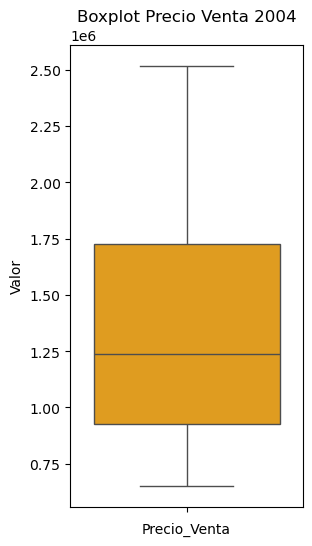

In [43]:
plt.figure(figsize = (3, 6))
sns.boxplot(one['Precio_Venta'], color = 'orange')
plt.title('Boxplot Precio Venta 2004')
plt.xlabel('Precio_Venta')
plt.ylabel('Valor')
plt.show()


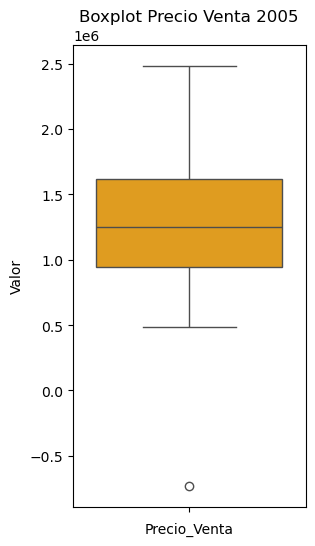

In [44]:
plt.figure(figsize = (3, 6))
sns.boxplot(two['Precio_Venta'], color = 'orange')
plt.title('Boxplot Precio Venta 2005')
plt.xlabel('Precio_Venta')
plt.ylabel('Valor')
plt.show()

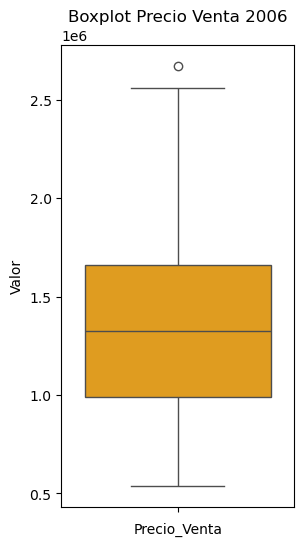

In [45]:
plt.figure(figsize = (3, 6))
sns.boxplot(three['Precio_Venta'], color = 'orange')
plt.title('Boxplot Precio Venta 2006')
plt.xlabel('Precio_Venta')
plt.ylabel('Valor')
plt.show()

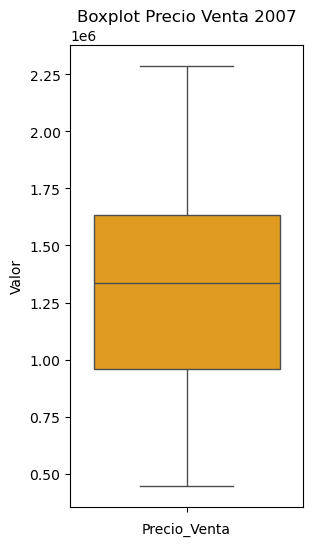

In [46]:
plt.figure(figsize = (3, 6))
sns.boxplot(four['Precio_Venta'], color = 'orange')
plt.title('Boxplot Precio Venta 2007')
plt.xlabel('Precio_Venta')
plt.ylabel('Valor')
plt.show()

### 1.5 Coeficiente de correlación entre 'Superficie' y 'Precio-Venta' en cada tipo de operación (Venta/Alquiler)

In [47]:
rows_Venta = dataBase1[dataBase1['Operacion'] == 'Venta']
rows_Alquiler = dataBase1[dataBase1['Operacion'] == 'Alquiler']

# si la variable tuviera valores NaN esto nos devolvería un error, tendríamos que filtrar los datos

coefficientOfCorrelation_Venta = np.corrcoef(rows_Venta['Superficie'], rows_Venta['Precio_Venta'])[0,1]
coefficientOfCorrelation_Alquiler = np.corrcoef(rows_Alquiler['Superficie'], rows_Alquiler['Precio_Venta'])[0,1]

print(f'Coeficiente de Correlación entre "Superficie" y "Precio_Venta" en Venta: {coefficientOfCorrelation_Venta}')
print(f'Coeficiente de Correlación entre "Superficie" y "Precio_Venta" en Alquiler: {coefficientOfCorrelation_Alquiler}')

Coeficiente de Correlación entre "Superficie" y "Precio_Venta" en Venta: 0.8584991929307706
Coeficiente de Correlación entre "Superficie" y "Precio_Venta" en Alquiler: 0.8338899232347955


# Futbol

In [48]:
dataBase2

,Any,Jornada,Partit ID,Data,Local,GL,GV,Visitant
0,1.0,1.0,1001.0,03/09/83,R.C.D. Espanyol,1.0,4.0,At. de Madrid
1,1.0,1.0,1002.0,03/09/83,Real S. de GijÃ³n,1.0,1.0,Valencia C.F.
2,1.0,1.0,1003.0,03/09/83,Real Murcia C.F.,3.0,1.0,Real Sociedad
3,1.0,1.0,1004.0,04/09/83,R.C.D. Mallorca,1.0,1.0,R. Zaragoza C.D.
4,1.0,1.0,1005.0,04/09/83,C.At. de Osasuna,0.0,0.0,U.D. Salamanca
...,...,...,...,...,...,...,...,...
8694,23.0,38.0,23377.0,13/05/06,Villarreal C.F.,2.0,0.0,Real Racing Club
8695,23.0,38.0,23378.0,16/05/06,C.At. de Osasuna,2.0,1.0,Valencia C.F.
8696,23.0,38.0,23379.0,16/05/06,Sevilla F.C.,4.0,3.0,Real Madrid C.F.
8697,23.0,38.0,23380.0,20/05/06,Ath. Club Bilbao,3.0,1.0,F.C. Barcelona


In [49]:
dataBase2.dtypes

Any          float64
Jornada      float64
Partit ID    float64
Data          object
Local         object
GL           float64
GV           float64
Visitant      object
dtype: object

In [50]:
dataBase2.isna().sum()

Any          1
Jornada      1
Partit ID    1
Data         1
Local        1
GL           1
GV           1
Visitant     1
dtype: int64

In [51]:
# Eliminamos valores NaN
dataBase2WithoutNaN = dataBase2.dropna()


### 1.1 Clasificación de Variables

- Any: Numérica y Absoluta
- Jornada: Numérica y De Razón
- Partit ID: Numérica y De Razón
- Data: Categórica y Ordinal
- Local: Categórica y Nominal
- GL: Numérica y Absoluta
- GV: Numérica y Absoluta
- Visitant: Categórica y Nominal

### 1.2 Medidas de tendencia central y de dispersión de número total de goles en cada partido

### 1.3 Equipo que más goles anotó y que más goles recibió por año

### 1.4 Boxplot del número total de goles en cada partido por año

### 1.5 Coeficiente de correlación entre 'Goles del Local' y 'Goles del visitante'